In [2]:
# importing required libraries 
import numpy as np
import cv2
from numba import jit
from matplotlib import pyplot as plt
import timeit

In [3]:
@jit
def seamCarving(imgReal):
    row, col = imgReal.shape[0:2]
    img = np.copy(imgReal)
    img = img.astype('int64')
    energy = np.zeros([row,col],dtype='int64')
    ret = np.zeros([row,col-1,3],dtype='uint8')
    
    maxi = 0
    
    #.......................................................................#
    ### Computing Energy Matrix
    
    for j in range(col):
        for i in range(row):
            b1,g1,r1 = img[i][j]
            b2,g2,r2 = img[i][j]
            
            if(j-1>=0):
                b1,g1,r1 = img[i][j-1]
            if(j+1<col):
                b2,g2,r2 = img[i][j+1]

            b,g,r = img[i][j]
            
            b3,g3,r3 = img[i][j]
            b4,g4,r4 = img[i][j]
            
            if(i+1<row):
                b3,g3,r3 = img[i+1][j]
            if(i-1>=0):
                b4,g4,r4 = img[i-1][j]

            energy[i][j] = (b1-b)**2 
            energy[i][j] = energy[i][j] + (b2-b)**2
            energy[i][j] = energy[i][j] + (g1-g)**2 
            energy[i][j] = energy[i][j] + (g2-g)**2 
            energy[i][j] = energy[i][j] + (r1-r)**2 
            energy[i][j] = energy[i][j] + (r2-r)**2
            energy[i][j] = energy[i][j] + (b3-b)**2
            energy[i][j] = energy[i][j] + (b4-b)**2
            energy[i][j] = energy[i][j] + (g3-g)**2 
            energy[i][j] = energy[i][j] + (g4-g)**2 
            energy[i][j] = energy[i][j] + (r3-r)**2 
            energy[i][j] = energy[i][j] + (r4-r)**2
            
            if(energy[i][j]>=maxi):
                maxi = energy[i][j]
     
    #print(maxi)
    #total = np.sum(energy) 
    #print("- total energy is ",total)
        
    path = [-1,0,1]    
    #print(maxi)
    #.......................................................................#
    ### Using Dynamic Programming Approach for finding Seam
    
    for i in range(1,row):
        for j in range(col):
            now = maxi
            for k in range(3):
                if(j-path[k]>=0 and j-path[k]<col):
                    now = min(now,energy[i-1][j-path[k]])
            energy[i][j] = energy[i][j] + now
    
    mini = maxi
    pos = 0
    maxi2 = maxi
    maxi = -1
    
    for j in range(col):
        if(mini>energy[row-1][j]):
            pos = j
        mini = min(mini,energy[row-1][j])
    
    energy[row-1][pos] = maxi
    
    #.......................................................................#
    ### Marking the Seam Path
    
    for j in reversed(range(1,row)):
        val = maxi2
        position = pos
        for k in path:
            if(k+pos-1>=0 and k+pos-1<col):
                if(val>energy[j-1][k+pos-1]):
                    position = k+pos-1
                    val = energy[j-1][k+pos-1]
        energy[j-1][position] = maxi
        pos = position
   
    #.......................................................................#
    ### Removing the Seam
    
    for i in range(row):
        idx = 0
        for j in range(col):
            if(energy[i][j]!=maxi):
                ret[i][idx] = imgReal[i][j]
                idx = idx + 1
    
    return ret

In [14]:
# Repeatedly call the same function k times to remove k seams
def seam_carving(img,k):
    print("Size Before:",img.shape[0:2])
    for i in range(k):
        img = seamCarving(img)
    print("Size After:",img.shape[0:2])
    
    # UnComment the following just for running on vertical compression
    # img = cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    plt.imshow(cv2.cvtColor(img ,cv2.COLOR_BGR2RGB ))

Size Before: (378, 504)
Size After: (378, 404)
1.3247078349995718


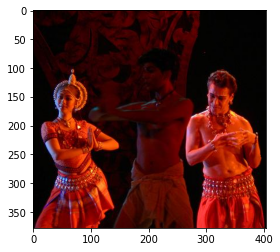

In [52]:
# Seam Carving on bangalore-dancers.jpg
# Shrink by 20%

img = cv2.imread('../images/bangalore-dancers.jpg')
start = timeit.default_timer()
seam_carving(img,100)
end = timeit.default_timer()
print(end-start)

Size Before: (378, 504)
Size After: (378, 303)
2.3668381840006987


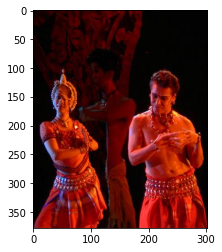

In [53]:
# Seam Carving on bangalore-dancers.jpg
# Shrink by 40%

img = cv2.imread('../images/bangalore-dancers.jpg')
start = timeit.default_timer()
seam_carving(img,201)
end = timeit.default_timer()
print(end-start)

Size Before: (378, 504)
Size After: (378, 202)
3.162240825000481


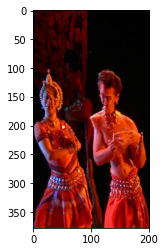

In [54]:
# Seam Carving on bangalore-dancers.jpg
# Shrink by 60%

img = cv2.imread('../images/bangalore-dancers.jpg')
start = timeit.default_timer()
seam_carving(img,302)
end = timeit.default_timer()
print(end-start)

Size Before: (150, 150)
Size After: (150, 120)
0.09789096099939343


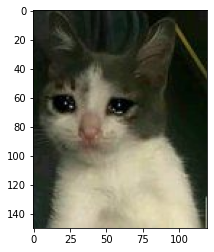

In [57]:
# Seam Carving on Cat.jpg
# Shrink by 20% 

img = cv2.imread('../images/cat.jpg')
start = timeit.default_timer()
seam_carving(img,30)
end = timeit.default_timer()
print(end-start)

Size Before: (150, 150)
Size After: (150, 90)
0.15154736099975707


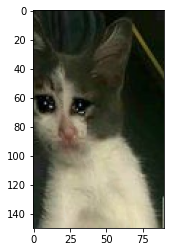

In [58]:
# Seam Carving on Cat.jpg
# Shrink by 40% 

img = cv2.imread('../images/cat.jpg')
start = timeit.default_timer()
seam_carving(img,60)
end = timeit.default_timer()
print(end-start)

Size Before: (150, 150)
Size After: (150, 60)
0.19356166499983374


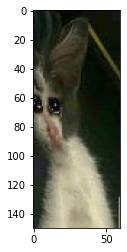

In [59]:
# Seam Carving on Cat.jpg
# Shrink by 20% 

img = cv2.imread('../images/cat.jpg')
start = timeit.default_timer()
seam_carving(img,90)
end = timeit.default_timer()
print(end-start)

Size Before: (1200, 1920)
Size After: (1200, 1536)
55.59843630500018


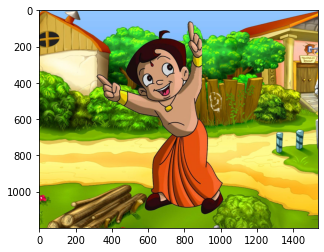

In [60]:
# Seam Carving on chhota-bheem.jpg
# Shrink by 20% 

img = cv2.imread('../images/chhota-bheem.jpg')
start = timeit.default_timer()
seam_carving(img,384)
end = timeit.default_timer()
print(end-start)

Size Before: (1200, 1920)
Size After: (1200, 1152)
100.47236166600032


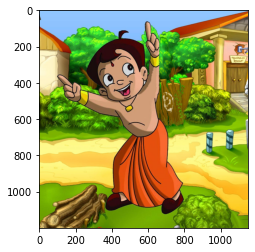

In [61]:
# Seam Carving on chhota-bheem.jpg
# Shrink by 40%
img = cv2.imread('../images/chhota-bheem.jpg')
start = timeit.default_timer()
seam_carving(img,768)
end = timeit.default_timer()
print(end-start)

Size Before: (1200, 1920)
Size After: (1200, 768)
130.98139637799977


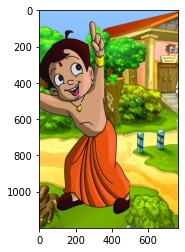

In [62]:
# Seam Carving on chhota-bheem.jpg
img = cv2.imread('../images/chhota-bheem.jpg')
start = timeit.default_timer()
seam_carving(img,1152)
end = timeit.default_timer()
print(end-start)

Size Before: (369, 880)
Size After: (369, 704)
3.2543398579991845


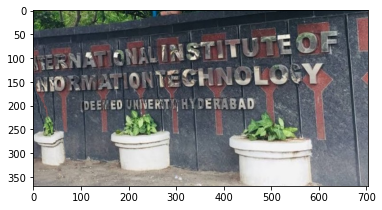

In [63]:
# Seam Carving on iiit.jpg
# Shrink by 20%

img = cv2.imread('../images/iiit.jpg')
start = timeit.default_timer()
seam_carving(img,176)
end = timeit.default_timer()
print(end-start)

Size Before: (369, 880)
Size After: (369, 528)
6.118130511000345


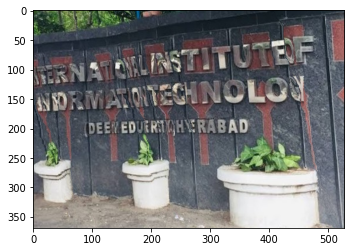

In [64]:
# Seam Carving on iiit.jpg
# Shrink by 40%

img = cv2.imread('../images/iiit.jpg')
start = timeit.default_timer()
seam_carving(img,352)
end = timeit.default_timer()
print(end-start)

Size Before: (369, 880)
Size After: (369, 352)
7.866483343999789


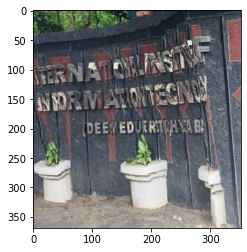

In [65]:
# Seam Carving on iiit.jpg
# Shrink by 60%

img = cv2.imread('../images/iiit.jpg')
start = timeit.default_timer()
seam_carving(img,528)
end = timeit.default_timer()
print(end-start)

Size Before: (375, 500)
Size After: (375, 400)
1.2517652280002949


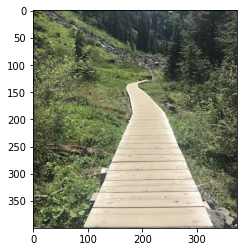

In [82]:
# Seam Carving on path.jpg
# Shrink by 20%

img = cv2.imread('../images/path.jpg')
img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
start = timeit.default_timer()
seam_carving(img,100)
end = timeit.default_timer()
print(end-start)

Size Before: (375, 500)
Size After: (375, 300)
2.228006290999474


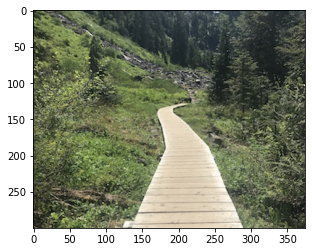

In [83]:
# Seam Carving on path.jpg
# Shrink by 40%

img = cv2.imread('../images/path.jpg')
img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
start = timeit.default_timer()
seam_carving(img,200)
end = timeit.default_timer()
print(end-start)

Size Before: (375, 500)
Size After: (375, 200)
2.7816098500006774


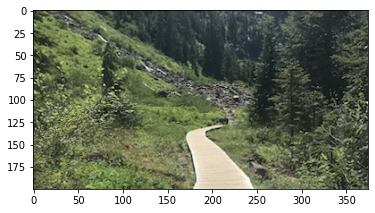

In [84]:
# Seam Carving on path.jpg
# Shrink by 60%

img = cv2.imread('../images/path.jpg')
img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
start = timeit.default_timer()
seam_carving(img,300)
end = timeit.default_timer()
print(end-start)

Size Before: (333, 500)
Size After: (333, 400)
1.1169632239998464


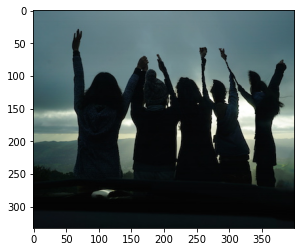

In [66]:
# Seam Carving on shadow.jpg
# Shrink by 20%

img = cv2.imread('../images/shadow.jpg')
start = timeit.default_timer()
seam_carving(img,100)
end = timeit.default_timer()
print(end-start)

Size Before: (333, 500)
Size After: (333, 300)
2.0705489840001974


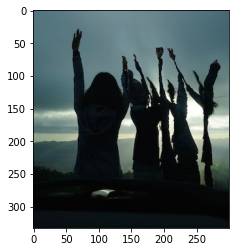

In [67]:
# Seam Carving on shadow.jpg
# Shrink by 40%

img = cv2.imread('../images/shadow.jpg')
start = timeit.default_timer()
seam_carving(img,200)
end = timeit.default_timer()
print(end-start)

Size Before: (333, 500)
Size After: (333, 200)
2.74360106200038


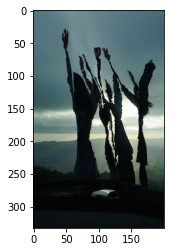

In [68]:
# Seam Carving on shadow.jpg
# Shrink by 60%

img = cv2.imread('../images/shadow.jpg')
start = timeit.default_timer()
seam_carving(img,300)
end = timeit.default_timer()
print(end-start)

Size Before: (500, 770)
Size After: (500, 616)
3.3418785960002424


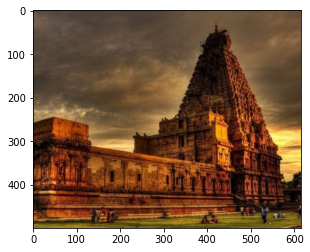

In [69]:
# Seam Carving on tanjore.jpg
# Shrink by 20%

img = cv2.imread('../images/tanjore.jpg')
start = timeit.default_timer()
seam_carving(img,154)
end = timeit.default_timer()
print(end-start)

Size Before: (500, 770)
Size After: (500, 462)
5.881487226999525


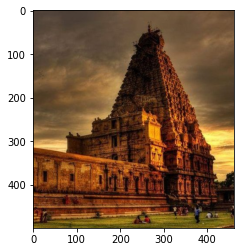

In [70]:
# Seam Carving on tanjore.jpg
# Shrink by 40%

img = cv2.imread('../images/tanjore.jpg')
start = timeit.default_timer()
seam_carving(img,308)
end = timeit.default_timer()
print(end-start)

Size Before: (500, 770)
Size After: (500, 308)
7.76424119100011


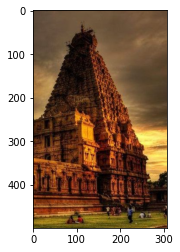

In [71]:
# Seam Carving on tanjore.jpg
# Shrink by 60%

img = cv2.imread('../images/tanjore.jpg')
start = timeit.default_timer()
seam_carving(img,462)
end = timeit.default_timer()
print(end-start)

Size Before: (319, 359)
Size After: (319, 288)
0.5795459639994078


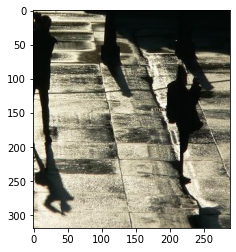

In [72]:
# Seam Carving on trafalgar-square.jpg
# Shrink by 20%

img = cv2.imread('../images/trafalgar-square.jpg')
start = timeit.default_timer()
seam_carving(img,71)
end = timeit.default_timer()
print(end-start)

Size Before: (319, 359)
Size After: (319, 217)
1.0933931509998729


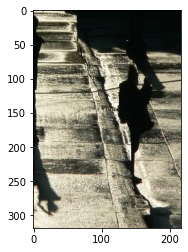

In [73]:
# Seam Carving on trafalgar-square.jpg
# Shrink by 40%

img = cv2.imread('../images/trafalgar-square.jpg')
start = timeit.default_timer()
seam_carving(img,142)
end = timeit.default_timer()
print(end-start)

Size Before: (319, 359)
Size After: (319, 142)
1.3970648109998365


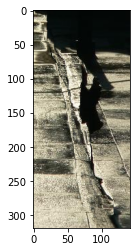

In [74]:
# Seam Carving on trafalgar-square.jpg
# Shrink by 60%

img = cv2.imread('../images/trafalgar-square.jpg')
start = timeit.default_timer()
seam_carving(img,217)
end = timeit.default_timer()
print(end-start)

Size Before: (378, 504)
Size After: (378, 404)
1.2827007410005535


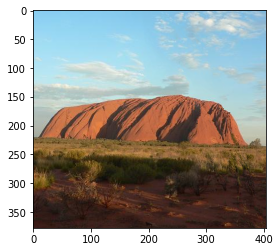

In [75]:
# Seam Carving on uluru.jpg
# Shrink by 20%

img = cv2.imread('../images/uluru.jpg')
start = timeit.default_timer()
seam_carving(img,100)
end = timeit.default_timer()
print(end-start)

Size Before: (378, 504)
Size After: (378, 303)
2.3386218510004255


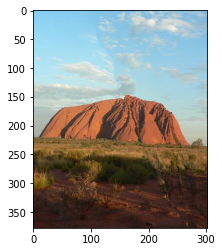

In [76]:
# Seam Carving on uluru.jpg
# Shrink by 40%

img = cv2.imread('../images/uluru.jpg')
start = timeit.default_timer()
seam_carving(img,201)
end = timeit.default_timer()
print(end-start)

Size Before: (378, 504)
Size After: (378, 201)
3.2592790620001324


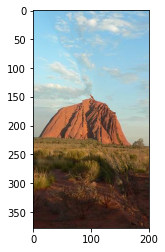

In [77]:
# Seam Carving on uluru.jpg
# Shrink by 60%

img = cv2.imread('../images/uluru.jpg')
start = timeit.default_timer()
seam_carving(img,303)
end = timeit.default_timer()
print(end-start)

Size Before: (264, 287)
Size After: (264, 230)
0.4347810039980686


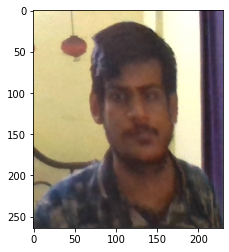

In [7]:
# With my Own Image :
# 20% removal
img = cv2.imread('../images/myOwnImg.png')
start = timeit.default_timer()
seam_carving(img,57)
end = timeit.default_timer()
print(end-start)

Size Before: (264, 287)
Size After: (264, 173)
0.67975425899931


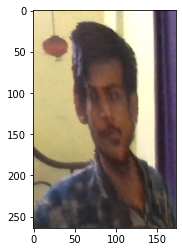

In [8]:
# With my Own Image :
# 40% removal
img = cv2.imread('../images/myOwnImg.png')
start = timeit.default_timer()
seam_carving(img,114)
end = timeit.default_timer()
print(end-start)

Size Before: (264, 287)
Size After: (264, 114)
0.8989114920041175


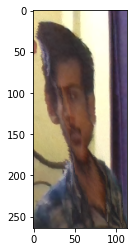

In [9]:
# With my Own Image :
# 60% removal
img = cv2.imread('../images/myOwnImg.png')
start = timeit.default_timer()
seam_carving(img,173)
end = timeit.default_timer()
print(end-start)

Size Before: (287, 264)
Size After: (287, 211)
0.39449736299866345


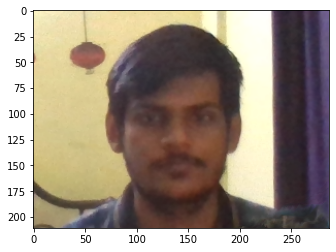

In [11]:
# Vertical Compression on my own image
# 20% removal
img = cv2.imread('../images/myOwnImg.png')
img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
start = timeit.default_timer()
seam_carving(img,53)
end = timeit.default_timer()
print(end-start)

Size Before: (287, 264)
Size After: (287, 158)
0.5897641760020633


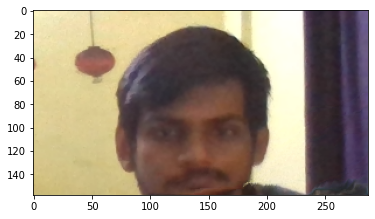

In [12]:
# Vertical Compression on my own image
# 40% removal
img = cv2.imread('../images/myOwnImg.png')
img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
start = timeit.default_timer()
seam_carving(img,106)
end = timeit.default_timer()
print(end-start)

Size Before: (287, 264)
Size After: (287, 106)
0.8590517970005749


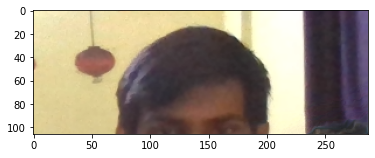

In [13]:
# Vertical Compression on my own image
# 20% removal
img = cv2.imread('../images/myOwnImg.png')
img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
start = timeit.default_timer()
seam_carving(img,158)
end = timeit.default_timer()
print(end-start)

Since most of the lower energy seams were on the lower lying part, unlike the bright upper part, it only removed the lower part

### Discussion for Question A

Using the same algorithm as discussed in the Assignment, I was able to run it on each of the given test images, the maximum time it took was for chhota-bheem.jpg, but it was also for just 3-4 min, all the other images' output was retrieved within one minute of time

<b>Below is the tabular form containing the Runtime information</b>

<table>
  <tr>
    <th>Image</th>
    <th>20%</th>
    <th>40%</th>
    <th>60%</th>
  </tr>
  <tr>
   <td>bangalore-dancers.jpg </td>
    <td>1.3247078349995718</td>
    <td>2.3668381840006987</td>
    <td>3.162240825000481</td>
  </tr>
    
  <tr>
   <td> cat.jpg </td>
    <td>0.09789096099939343</td>
    <td>0.15154736099975707</td>
    <td>0.19356166499983374</td>
  </tr>

  <tr>
   <td> chhota-bheem.jpg </td>
    <td>55.59843630500018</td>
    <td>100.47236166600032</td>
    <td>130.98139637799977</td>
  </tr>    
    
    
  <tr>
   <td> iiit.jpg</td>
    <td>3.2543398579991845</td>
    <td>6.118130511000345</td>
    <td>7.866483343999789</td>
  </tr> 

  <tr>
   <td> path.jpg</td>
    <td>1.2517652280002949</td>
    <td>2.228006290999474</td>
    <td>2.7816098500006774</td>
  </tr>     
    
  <tr>
   <td> shadow.jpg</td>
    <td>0.5795459639994078</td>
    <td>1.0933931509998729</td>
    <td>1.3970648109998365</td>
  </tr>    
    
  <tr>
   <td> tanjore.jpg</td>
    <td>3.3418785960002424</td>
    <td>5.881487226999525</td>
    <td>7.76424119100011</td>
  </tr>     
    
  <tr>
   <td> trafalgar-square.jpg</td>
    <td>0.5795459639994078</td>
    <td>1.0933931509998729</td>
    <td>1.3970648109998365</td>
  </tr>    
    
  <tr>
   <td> uluru.jpg </td>
    <td>1.2827007410005535</td>
    <td>2.3386218510004255</td>
    <td>3.2592790620001324</td>
  </tr>

</table>


<b>The Psuedo Code / Algorithm is provided below: </b>

for i and j in image.size() <br>
&nbsp;&nbsp;&nbsp;&nbsp;calculate the energy using the rule provided in the assignment 

Using Dynamic Programming Now: <br>
&nbsp;&nbsp;&nbsp;&nbsp; For each cell in energy add the minimum of the three cells just above it, <br> 
&nbsp;&nbsp;&nbsp;&nbsp;i.e : for (i,j) check for minimum values among (i-1,j-1), (i-1,j), and (i-1,j+1) position, and add it to current (i,j) value <br>
&nbsp;&nbsp;&nbsp;&nbsp; Now Proceed to i+1 $^{th}$ row and repeat the same till the last row

Now Check for the minimum value in the last row and store its index <br>

From the current minimum cell value, proceed towards the top row, via moving through the minimum value cell among the three cells available to its top and replace its values ny "inf", so as to mark them

Removing the Seam: <br>
&nbsp;&nbsp;&nbsp;&nbsp; To Remove the seam we will include all the cells in the new image we are returning, except those cells where we have marked the energy as "inf"

Repeat the same Process k times to remove k-seams

### Question B

#### Big O analysis
For an image of size h x w

To remove k number of seams we first Calculate the energy Matrix in h$*$w time, and to find the seam we use 3h$*$w algorithm, and then mark the minimum path in O(h), and then in h$*$w , we remake the image removing one seam

The Upper Bound to remove seams = w

##### The Complexity to remove One Seam

For Dynamic Programming Algorithm : O(h$*$w)

For a Naive Solution : O(w$*$3$^h$)

##### The Complexity to remove every possible  seam

For Dynamic Programming Algorithm : O(h$*$w$^2$)

For a Naive Solution : O(w$^2$3$^h$)

here, w = width and h = hieght

### Question C

#### SubQuestion 1:
#####  Will the result be the same if the image is flipped upside down?
Yes, as the Energy of each cell is dependent on its neighbouring cells and these neighbouring would anyway remain neighbours to this cell, it would have the same values any way and the Path determined using Dynamic Programming would just be same and hence the seams removed would also be same

##### What happens to the overall energy in the image during seam carving?
Considering, the overall energy of the image to be the sum of energy of each cells, I tried to print the energy of image after each seam is removed and it was observed that Overall (Total) energy of the image was being reduced, however there were few times where the total energy was increasing slightly, but at the end it was always lesser that the initial energy , as each seam were being removed, for example, here is the attached output for cat.jpg :

- total energy is  10915832
- total energy is  10910839
- total energy is  10906062
- total energy is  10901805
- total energy is  10896753
- total energy is  10893007
- total energy is  10889726
- total energy is  10883561
- total energy is  10874034
- total energy is  10866019
- total energy is  10860021
- total energy is  10850664
- total energy is  10840156
- total energy is  10832599
- total energy is  10822662
- total energy is  10805868
- total energy is  10790155
- total energy is  10780555
- total energy is  10772106
- total energy is  10759248
- total energy is  10745724
- total energy is  10735022
- total energy is  10721198
- total energy is  10705594
- total energy is  10689393

We can clearly obvserve how after each seam was removed the Total energy or the overall energy is getting reduced, similarly, I also checked for trafalgar-square.jpg

- total energy is  531072254
- total energy is  530728506
- total energy is  530863574
- total energy is  530894442
- total energy is  530776026
- total energy is  530823114
- total energy is  530780426
- total energy is  530754222
- total energy is  530654054
- total energy is  530735706
- total energy is  530644190
- total energy is  530665042
- total energy is  530752566
- total energy is  530478004
- total energy is  530337469
- total energy is  530197119
- total energy is  529955085
- total energy is  529748234
- total energy is  529461164
- total energy is  528740669
- total energy is  526285312
- total energy is  523473989
- total energy is  521575663
- total energy is  520261386
- total energy is  519732565

and it is observed yet again, that the total energy is being reduced overall

#### SubQuestion - 2:
#####  Suppose we want to resize the image in both the dimensions, should we remove the horizontal seams first, or remove the vertical seams first, or should we alternate between the two, or are there any optimal order?
The optimal approach to remove the seams would be calculating both horizontal as well as vertical seams and then removing whichever is minimum of the two. There can't be any predefined order as these seams will differ from image to image